In [39]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt 

## gelu

In [68]:
#x = np.random.rand(10)
#x = np.array(list(range(-10, 10)))
x = np.arange(-5, 5, 0.2)

In [69]:
def gelu_py(x, approximate=True):
    x = tf.convert_to_tensor(x, dtype=tf.float16)
    if approximate:
        pi = tf.cast(math.pi, x.dtype)
        coeff = tf.cast(0.044715, x.dtype)
        return 0.5 * x * (1.0 + tf.tanh(tf.sqrt(2.0 / pi) * (x + coeff * tf.pow(x, 3))))
    else:
        return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(tf.sqrt(2.0), x.dtype)))

In [70]:
print('input :',x)
print()
print('output :',gelu_py(x))

input : [-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000000e+00 -3.8000000e+00 -3.6000000e+00
 -3.4000000e+00 -3.2000000e+00 -3.0000000e+00 -2.8000000e+00
 -2.6000000e+00 -2.4000000e+00 -2.2000000e+00 -2.0000000e+00
 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01  4.4408921e-15  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00  2.0000000e+00
  2.2000000e+00  2.4000000e+00  2.6000000e+00  2.8000000e+00
  3.0000000e+00  3.2000000e+00  3.4000000e+00  3.6000000e+00
  3.8000000e+00  4.0000000e+00  4.2000000e+00  4.4000000e+00
  4.6000000e+00  4.8000000e+00]

output : tf.Tensor(
[-0.0000e+00 -0.0000e+00 -0.0000e+00 -0.0000e+00 -0.0000e+00 -0.0000e+00
 -0.0000e+00 -0.0000e+00 -8.3017e-04 -1.5621e-03 -3.6621e-03 -6.8359e-03
 -1.1421e-02 -1.9333e-02 -3.0609e-02 -4.5410e-02 -6.5002e-02 

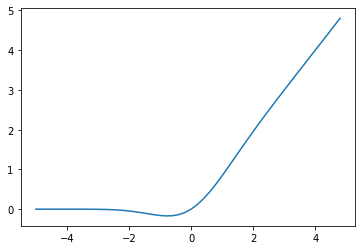

In [71]:
plt.plot(x, gelu_py(x)) 

## hardshrink

In [72]:
#x = np.random.rand(10)
#x = np.array(list(range(-10, 10)))
x = np.arange(-5, 5, 0.2)

In [73]:
def hardshrink_py(x, lower = -0.5, upper = 0.5) -> tf.Tensor:
    if lower > upper:
        raise ValueError(
            "The value of lower is {} and should"
            " not be higher than the value "
            "variable upper, which is {} .".format(lower, upper)
        )
    mask_lower = x < lower
    mask_upper = upper < x
    mask = tf.logical_or(mask_lower, mask_upper)
    mask = tf.cast(mask, x.dtype)
    return x * mask

In [74]:
print('input :',x)
print()
print('output :',hardshrink_py(x))

input : [-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000000e+00 -3.8000000e+00 -3.6000000e+00
 -3.4000000e+00 -3.2000000e+00 -3.0000000e+00 -2.8000000e+00
 -2.6000000e+00 -2.4000000e+00 -2.2000000e+00 -2.0000000e+00
 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01  4.4408921e-15  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00  2.0000000e+00
  2.2000000e+00  2.4000000e+00  2.6000000e+00  2.8000000e+00
  3.0000000e+00  3.2000000e+00  3.4000000e+00  3.6000000e+00
  3.8000000e+00  4.0000000e+00  4.2000000e+00  4.4000000e+00
  4.6000000e+00  4.8000000e+00]

output : tf.Tensor(
[-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.  -0.   0.   0.   0.
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.  

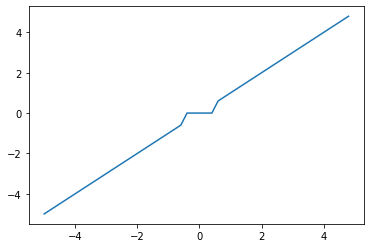

In [75]:
plt.plot(x, hardshrink_py(x))

## lisht

In [76]:
#x = np.random.rand(10)
#x = np.array(list(range(-10, 10)))
x = np.arange(-5, 5, 0.2)

In [77]:
def lisht_py(x):
    return x * tf.math.tanh(x)

In [80]:
print('input :',x)
print()
print('output :',lisht_py(x))

input : [-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000000e+00 -3.8000000e+00 -3.6000000e+00
 -3.4000000e+00 -3.2000000e+00 -3.0000000e+00 -2.8000000e+00
 -2.6000000e+00 -2.4000000e+00 -2.2000000e+00 -2.0000000e+00
 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01  4.4408921e-15  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00  2.0000000e+00
  2.2000000e+00  2.4000000e+00  2.6000000e+00  2.8000000e+00
  3.0000000e+00  3.2000000e+00  3.4000000e+00  3.6000000e+00
  3.8000000e+00  4.0000000e+00  4.2000000e+00  4.4000000e+00
  4.6000000e+00  4.8000000e+00]

output : tf.Tensor(
[4.99954602e+00 4.79934985e+00 4.59907053e+00 4.39867375e+00
 4.19811154e+00 3.99731720e+00 3.79619847e+00 3.59462859e+00
 3.39243475e+00 3.18938367e+00 2.98516426e+00 2.77936826e+00
 2.57147125e+00 2.360819

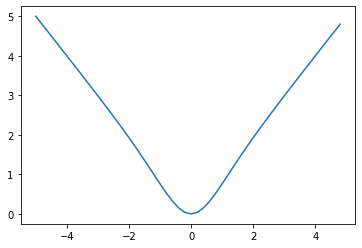

In [81]:
plt.plot(x, lisht_py(x))

## Mish

In [82]:
#x = np.random.rand(10)
#x = np.array(list(range(-10, 10)))
x = np.arange(-5, 5, 0.2)

In [83]:
def mish_py(x):
    return x * tf.math.tanh(tf.math.softplus(x))

In [85]:
print('input :',x)
print()
print('output :',mish_py(x))

input : [-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000000e+00 -3.8000000e+00 -3.6000000e+00
 -3.4000000e+00 -3.2000000e+00 -3.0000000e+00 -2.8000000e+00
 -2.6000000e+00 -2.4000000e+00 -2.2000000e+00 -2.0000000e+00
 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01  4.4408921e-15  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00  2.0000000e+00
  2.2000000e+00  2.4000000e+00  2.6000000e+00  2.8000000e+00
  3.0000000e+00  3.2000000e+00  3.4000000e+00  3.6000000e+00
  3.8000000e+00  4.0000000e+00  4.2000000e+00  4.4000000e+00
  4.6000000e+00  4.8000000e+00]

output : tf.Tensor(
[-3.35762377e-02 -3.93402423e-02 -4.60060654e-02 -5.36887075e-02
 -6.25092536e-02 -7.25917408e-02 -8.40583080e-02 -9.70220345e-02
 -1.11576720e-01 -1.27782682e-01 -1.45647461e-01 -1.65100174e-01
 -1.85958136

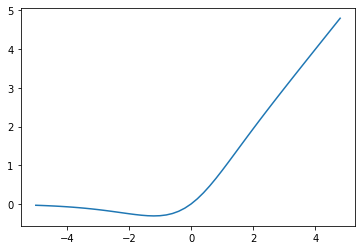

In [86]:
plt.plot(x, mish_py(x))

## rrelu

In [88]:
#x = np.random.rand(10)
#x = np.array(list(range(-10, 10)))
x = np.arange(-5, 5, 0.2)

In [89]:
def rrelu_py(
    x,
    lower = 0.125,
    upper = 0.3333333333333333,
    training = None,
    seed = None,
) -> tf.Tensor:
    
    x = tf.convert_to_tensor(x)
    if training is None:
        training = tf.keras.backend.learning_phase()
        training = bool(tf.keras.backend.get_value(training))

    if training:
        alpha = tf.random.uniform(
            tf.shape(x), minval=lower, maxval=upper, dtype=x.dtype, seed=seed
        )
    else:
        alpha = tf.cast((lower + upper) / 2, x.dtype)

    return tf.where(x >= 0, x, alpha * x)

In [90]:
print('input :',x)
print()
print('output :',rrelu_py(x))

input : [-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000000e+00 -3.8000000e+00 -3.6000000e+00
 -3.4000000e+00 -3.2000000e+00 -3.0000000e+00 -2.8000000e+00
 -2.6000000e+00 -2.4000000e+00 -2.2000000e+00 -2.0000000e+00
 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01  4.4408921e-15  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00  2.0000000e+00
  2.2000000e+00  2.4000000e+00  2.6000000e+00  2.8000000e+00
  3.0000000e+00  3.2000000e+00  3.4000000e+00  3.6000000e+00
  3.8000000e+00  4.0000000e+00  4.2000000e+00  4.4000000e+00
  4.6000000e+00  4.8000000e+00]

output : tf.Tensor(
[-1.14583336e+00 -1.10000002e+00 -1.05416669e+00 -1.00833336e+00
 -9.62500021e-01 -9.16666687e-01 -8.70833352e-01 -8.25000018e-01
 -7.79166684e-01 -7.33333349e-01 -6.87500015e-01 -6.41666681e-01
 -5.95833346

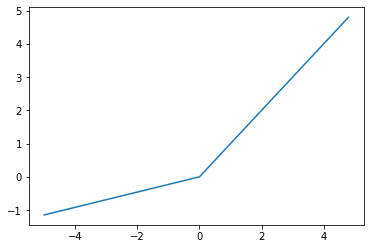

In [91]:
plt.plot(x, rrelu_py(x))

## softshrink

In [92]:
#x = np.random.rand(10)
#x = np.array(list(range(-10, 10)))
x = np.arange(-5, 5, 0.2)

In [104]:
def softshrink_py(x, lower=-0.5, upper=0.5):
    if lower > upper:
        raise ValueError(
            "The value of lower is {} and should"
            " not be higher than the value "
            "variable upper, which is {} .".format(lower, upper)
        )
    values_below_lower = tf.where(x < lower, x - lower, 0)
    values_above_upper = tf.where(upper < x, x - upper, 0)
    return values_below_lower + values_above_upper

In [105]:
print('input :',x)
print()
print('output :',softshrink_py(x))

input : [-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000000e+00 -3.8000000e+00 -3.6000000e+00
 -3.4000000e+00 -3.2000000e+00 -3.0000000e+00 -2.8000000e+00
 -2.6000000e+00 -2.4000000e+00 -2.2000000e+00 -2.0000000e+00
 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01  4.4408921e-15  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00  2.0000000e+00
  2.2000000e+00  2.4000000e+00  2.6000000e+00  2.8000000e+00
  3.0000000e+00  3.2000000e+00  3.4000000e+00  3.6000000e+00
  3.8000000e+00  4.0000000e+00  4.2000000e+00  4.4000000e+00
  4.6000000e+00  4.8000000e+00]

output : tf.Tensor(
[-4.5 -4.3 -4.1 -3.9 -3.7 -3.5 -3.3 -3.1 -2.9 -2.7 -2.5 -2.3 -2.1 -1.9
 -1.7 -1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.   0.   0.   0.   0.
  0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5 

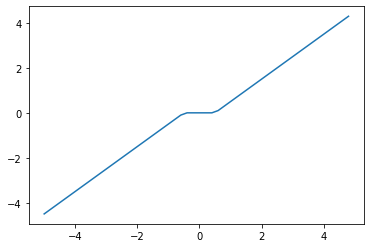

In [106]:
plt.plot(x, softshrink_py(x))

## tanhshrink

In [107]:
#x = np.random.rand(10)
#x = np.array(list(range(-10, 10)))
x = np.arange(-5, 5, 0.2)

In [108]:
def tanhshrink_py(x):
    return x - tf.math.tanh(x)

In [111]:
print('input :',x)
print()
print('output :',tanhshrink_py(x))

input : [-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000000e+00 -3.8000000e+00 -3.6000000e+00
 -3.4000000e+00 -3.2000000e+00 -3.0000000e+00 -2.8000000e+00
 -2.6000000e+00 -2.4000000e+00 -2.2000000e+00 -2.0000000e+00
 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01  4.4408921e-15  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00  2.0000000e+00
  2.2000000e+00  2.4000000e+00  2.6000000e+00  2.8000000e+00
  3.0000000e+00  3.2000000e+00  3.4000000e+00  3.6000000e+00
  3.8000000e+00  4.0000000e+00  4.2000000e+00  4.4000000e+00
  4.6000000e+00  4.8000000e+00]

output : tf.Tensor(
[-4.00009080e+00 -3.80013545e+00 -3.60020206e+00 -3.40030142e+00
 -3.20044963e+00 -3.00067070e+00 -2.80100040e+00 -2.60149206e+00
 -2.40222507e+00 -2.20331760e+00 -2.00494525e+00 -1.80736848e+00
 -1.61097260

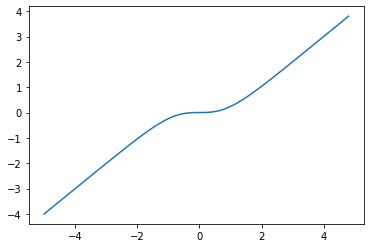

In [112]:
plt.plot(x, tanhshrink_py(x))